In [282]:
.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    1768 non-null   object 
 1   time    1768 non-null   object 
 2   h       1768 non-null   float64
 3   o3      1508 non-null   float64
 4   p       1768 non-null   float64
 5   pm10    1716 non-null   float64
 6   pm25    1768 non-null   float64
 7   r       1612 non-null   float64
 8   t       1768 non-null   float64
 9   w       1768 non-null   float64
dtypes: float64(8), object(2)
memory usage: 138.3+ KB


In [284]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assume your dataframe looks like:
df = pd.read_csv('air_data_train.csv').drop(columns=['Unnamed: 0','co','no2','so2','dew']).fillna(0.0)

def create_lag_features(df, group_col='City', time_col='time', label_col='pm25', lags=3):
    df = df.sort_values([group_col, time_col])
    
    # Include label col in feature_cols
    feature_cols = df.columns.difference([group_col, time_col])
    
    # Create lag features (including label_col)
    for col in feature_cols:
        for lag in range(1, lags + 1):
            df[f"{col}_lag{lag}"] = df.groupby(group_col)[col].shift(lag)
    
    df = df.dropna()
    return df


In [214]:
df_lagged = create_lag_features(df, lags=5)
df_lagged

,City,time,co,dew,h,no2,o3,p,pm10,pm25,...,t_lag1,t_lag2,t_lag3,t_lag4,t_lag5,w_lag1,w_lag2,w_lag3,w_lag4,w_lag5
5,Ayutthaya,2025-02-24,0.1,-6.10,10.00,3.5,5.2,1016.90,64.0,42.0,...,31.50,28.40,25.80,29.80,29.8,2.3,0.9,1.0,2.5,2.5
6,Ayutthaya,2025-02-25,0.1,17.80,51.50,3.5,5.2,1016.40,64.0,52.0,...,28.50,31.50,28.40,25.80,29.8,5.1,2.3,0.9,1.0,2.5
7,Ayutthaya,2025-02-26,0.1,5.85,33.15,3.5,5.2,1016.75,64.0,53.0,...,28.80,28.50,31.50,28.40,25.8,1.5,5.1,2.3,0.9,1.0
8,Ayutthaya,2025-02-27,0.1,19.00,41.00,3.5,5.2,1014.00,64.0,73.0,...,26.20,28.80,28.50,31.50,28.4,3.3,1.5,5.1,2.3,0.9
9,Ayutthaya,2025-02-28,0.1,-6.10,7.90,3.5,5.2,1014.00,64.0,70.0,...,34.00,26.20,28.80,28.50,31.5,3.0,3.3,1.5,5.1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,Trat,2025-04-07,0.1,9.55,38.75,2.9,2.4,1008.65,40.0,35.5,...,32.40,32.40,30.00,31.00,33.0,1.0,1.0,3.6,1.5,2.0
1608,Trat,2025-04-08,0.1,24.50,75.00,2.9,2.4,1012.50,40.0,40.0,...,32.25,32.40,32.40,30.00,31.0,2.0,1.0,1.0,3.6,1.5
1609,Trat,2025-04-09,0.1,26.00,70.00,2.9,2.4,1012.00,40.0,46.0,...,29.40,32.25,32.40,32.40,30.0,1.0,2.0,1.0,1.0,3.6
1610,Trat,2025-04-10,0.1,24.40,96.50,2.9,2.4,1011.90,40.0,97.0,...,32.00,29.40,32.25,32.40,32.4,4.1,1.0,2.0,1.0,1.0


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

feature_cols = [col for col in df_lagged.columns if '_lag' in col]
X = df_lagged[feature_cols]
y = df_lagged['pm25']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_scaled, y)

# Show coefficients
for name, coef in zip(feature_cols, model.coef_):
    print(f"{name}: {coef:.4f}")


co_lag1: -3240868488.3354
co_lag2: -44968192222916.4219
co_lag3: -39471507354760.6250
co_lag4: 6179769895759.1279
co_lag5: -22341880111200.2734
dew_lag1: -0.7113
dew_lag2: -0.0998
dew_lag3: -0.6943
dew_lag4: 0.6399
dew_lag5: 1.1108
h_lag1: -0.1943
h_lag2: -1.5113
h_lag3: 0.4727
h_lag4: 0.4902
h_lag5: -0.7119
no2_lag1: 4.4141
no2_lag2: 0.0762
no2_lag3: -5.2949
no2_lag4: -0.5127
no2_lag5: 1.4365
o3_lag1: 1.2383
o3_lag2: -1.5781
o3_lag3: -4.9277
o3_lag4: 4.0752
o3_lag5: 2.0430
p_lag1: 0.6406
p_lag2: -2.6270
p_lag3: 0.7207
p_lag4: -2.4609
p_lag5: 0.9121
pm10_lag1: 3.4922
pm10_lag2: -1.3906
pm10_lag3: 0.6270
pm10_lag4: 2.2090
pm10_lag5: -1.8770
pm25_lag1: 22.5942
pm25_lag2: 9.7397
pm25_lag3: -1.6953
pm25_lag4: 1.4434
pm25_lag5: 0.0879
r_lag1: 0.3467
r_lag2: 0.2373
r_lag3: 0.0420
r_lag4: 2.8975
r_lag5: -2.9121
so2_lag1: -2.2393
so2_lag2: 3.5713
so2_lag3: -1.1895
so2_lag4: 0.3750
so2_lag5: -0.7051
t_lag1: 1.4512
t_lag2: -5.4053
t_lag3: 0.5898
t_lag4: 0.9053
t_lag5: -1.6892
w_lag1: -1.0557
w_l

In [83]:
df = df.fillna(0.0)

In [84]:
coeff_dict = {}

for city, group in df.groupby('City'):
    df_lagged = create_lag_features(group, lags=5)
    X = df_lagged[feature_cols]
    y = df_lagged['pm25']
    if len(X) > 10:  # Only train if enough data
        print('\t\t\t',city)
        model = LinearRegression().fit(X, y)
        coeff_dict[city] = model.coef_
    else:
        print(city)


			 Ayutthaya
			 Bangkok
			 Chiang Mai
			 Chonburi
			 Kanchanaburi
			 Lampang
			 Lamphun
			 Mueang Chiang Rai
			 Mueang Khon Kaen
			 Nakhon Pathom
			 Nakhon Ratchasima
			 Nakhon Sawan
			 Nan
			 Narathiwat
			 Nong Khai
			 Nonthaburi
			 Pathum Thani
			 Phayao
			 Phitsanulok
			 Phuket
			 Prachuap Khiri Khan
			 Ratchaburi
			 Rayong
			 Sakon Nakhon
			 Samut Prakan
			 Samut Sakhon
			 Saraburi
			 Satun
			 Suphan Buri
			 Trang
			 Trat
			 Ubon Ratchathani
			 Uttaradit
			 Yala


In [85]:
(feature_cols)

['co_lag1',
 'co_lag2',
 'co_lag3',
 'co_lag4',
 'co_lag5',
 'dew_lag1',
 'dew_lag2',
 'dew_lag3',
 'dew_lag4',
 'dew_lag5',
 'h_lag1',
 'h_lag2',
 'h_lag3',
 'h_lag4',
 'h_lag5',
 'no2_lag1',
 'no2_lag2',
 'no2_lag3',
 'no2_lag4',
 'no2_lag5',
 'o3_lag1',
 'o3_lag2',
 'o3_lag3',
 'o3_lag4',
 'o3_lag5',
 'p_lag1',
 'p_lag2',
 'p_lag3',
 'p_lag4',
 'p_lag5',
 'pm10_lag1',
 'pm10_lag2',
 'pm10_lag3',
 'pm10_lag4',
 'pm10_lag5',
 'pm25_lag1',
 'pm25_lag2',
 'pm25_lag3',
 'pm25_lag4',
 'pm25_lag5',
 'r_lag1',
 'r_lag2',
 'r_lag3',
 'r_lag4',
 'r_lag5',
 'so2_lag1',
 'so2_lag2',
 'so2_lag3',
 'so2_lag4',
 'so2_lag5',
 't_lag1',
 't_lag2',
 't_lag3',
 't_lag4',
 't_lag5',
 'w_lag1',
 'w_lag2',
 'w_lag3',
 'w_lag4',
 'w_lag5']

In [86]:
city_type = {
    'Samut Prakan': 'Peripheral',
    'Nakhon Ratchasima': 'Major',
    'Surin': 'Peripheral',
    'Sakon Nakhon': 'Peripheral',
    'Mueang Khon Kaen': 'Major',
    'Nong Khai': 'Peripheral',
    'Kanchanaburi': 'Major',
    'Suphan Buri': 'Peripheral',
    'Uthai Thani': 'Peripheral',
    'Nakhon Sawan': 'Peripheral',
    'Phitsanulok': 'Peripheral',
    'Kamphaeng Phet': 'Peripheral',
    'Lamphun': 'Peripheral',
    'Lampang': 'Peripheral',
    'Phayao': 'Peripheral',
    'Bangkok': 'Major',
    'Trat': 'Peripheral',
    'Nonthaburi': 'Peripheral',
    'Nan': 'Peripheral',
    'Ubon Ratchathani': 'Peripheral',
    'Samut Sakhon': 'Peripheral',
    'Chiang Mai': 'Major',
    'Mueang Chiang Rai': 'Peripheral',
    'Ayutthaya': 'Peripheral',
    'Uttaradit': 'Peripheral',
    'Rayong': 'Major',
    'Pathum Thani': 'Peripheral',
    'Chonburi': 'Major',
    'Nakhon Pathom': 'Peripheral',
    'Ratchaburi': 'Peripheral',
    'Phuket': 'Major',
    'Yala': 'Peripheral',
    'Krabi': 'Peripheral',
    'Trang': 'Peripheral',
    'Satun': 'Peripheral',
    'Pattani': 'Peripheral',
    'Narathiwat': 'Peripheral',
    'Prachuap Khiri Khan': 'Peripheral',
    'Saraburi': 'Peripheral',
}

In [87]:
coefMat = pd.DataFrame(coeff_dict).T
coefMat = coefMat.reset_index()
coefMat['city_type'] = coefMat['index'].map(city_type)
coefMat

,index,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,city_type
0,Ayutthaya,7.256535e+13,2.295188e+14,-1.327255e+14,-2.176359e+13,-9.028483e+13,-1.958832e+00,-8.352215e-02,-1.916793e-01,-8.720703e-01,...,0.495117,1.583984,7.751953,-1.696289,6.559082,-5.333984,9.096680,-9.180664,-9.564575,Peripheral
1,Bangkok,5.029588e-12,-1.614819e-12,1.104228e-12,-5.248024e-12,2.690514e-12,-5.542455e-12,-6.883383e-12,-2.270406e-12,1.963985e-12,...,-3.876690,-2.341845,-35.124043,-16.864937,5.484840,-12.732820,6.552847,8.657885,-4.350989,Major
2,Chiang Mai,2.372269e-13,-4.556772e-13,3.371470e-13,-2.049749e-13,2.572265e-13,8.180956e-15,5.055956e-13,2.886580e-15,-1.362382e-13,...,-1.121750,-1.929059,0.614627,2.639403,-30.226087,-3.339243,0.700378,23.634367,-10.799360,Major
3,Chonburi,-6.610684e-14,7.319145e-14,-3.003153e-14,-2.498002e-14,-7.227552e-14,-2.032522e-01,2.747747e+00,2.634042e+00,9.714933e-01,...,-0.210243,1.551252,-2.100241,0.273933,8.419685,-5.143935,-8.068437,-1.201538,-5.363319,Major
4,Kanchanaburi,-3.831657e-14,-3.602674e-14,-4.624079e-14,1.590950e-13,-4.427014e-14,2.853015e+00,1.430774e+00,-1.762356e+00,-2.428162e+00,...,-3.095623,-3.649330,4.975555,-3.506832,-2.044114,1.517905,7.205669,10.116246,8.053205,Major
5,Lampang,-6.724066e-13,-1.827427e-13,1.122435e-13,-8.351653e-14,-4.665157e-13,2.163049e+00,1.998939e-01,6.616888e-01,1.358477e+00,...,-0.810594,-1.209070,0.396975,-1.460285,1.042626,11.396720,13.254216,10.953971,9.645200,Peripheral
6,Lamphun,1.574002e-10,-8.190984e-11,1.882496e-10,-2.392266e-10,-3.752194e-10,-7.618379e+01,2.830746e+01,-5.680043e+01,1.383293e+01,...,-27.208274,163.401561,-31.820568,15.797198,-230.133371,-183.641854,-117.030670,-183.673777,146.230434,Peripheral
7,Mueang Chiang Rai,2.699507e-13,-3.962108e-15,-1.067479e-13,-4.356238e-14,8.665291e-14,2.764455e-14,-1.987299e-14,-4.440892e-14,3.774758e-14,...,4.019457,-0.775852,-4.260384,4.675303,5.717961,5.247326,4.624031,-0.042893,-3.740439,Peripheral
8,Mueang Khon Kaen,-2.327027e-13,-3.469447e-13,3.569367e-14,5.395684e-14,7.632783e-14,4.077876e-01,-6.421496e+00,1.006939e-01,-3.990029e+00,...,5.771008,1.538480,3.028969,2.734133,2.854777,-9.850155,-21.996320,-16.771008,-14.477885,Major
9,Nakhon Pathom,1.943926e-12,-1.220690e-13,1.395606e-12,-4.261314e-13,8.396062e-13,5.420025e+00,1.082840e+00,4.863852e+00,-7.266283e+00,...,-20.359983,-32.492766,14.708847,14.279066,0.418135,24.444466,-7.945328,-5.147261,25.817805,Peripheral


In [88]:
coefMat.columns = ['city']+feature_cols+['city_type']
coefMat

,city,co_lag1,co_lag2,co_lag3,co_lag4,co_lag5,dew_lag1,dew_lag2,dew_lag3,dew_lag4,...,t_lag2,t_lag3,t_lag4,t_lag5,w_lag1,w_lag2,w_lag3,w_lag4,w_lag5,city_type
0,Ayutthaya,7.256535e+13,2.295188e+14,-1.327255e+14,-2.176359e+13,-9.028483e+13,-1.958832e+00,-8.352215e-02,-1.916793e-01,-8.720703e-01,...,0.495117,1.583984,7.751953,-1.696289,6.559082,-5.333984,9.096680,-9.180664,-9.564575,Peripheral
1,Bangkok,5.029588e-12,-1.614819e-12,1.104228e-12,-5.248024e-12,2.690514e-12,-5.542455e-12,-6.883383e-12,-2.270406e-12,1.963985e-12,...,-3.876690,-2.341845,-35.124043,-16.864937,5.484840,-12.732820,6.552847,8.657885,-4.350989,Major
2,Chiang Mai,2.372269e-13,-4.556772e-13,3.371470e-13,-2.049749e-13,2.572265e-13,8.180956e-15,5.055956e-13,2.886580e-15,-1.362382e-13,...,-1.121750,-1.929059,0.614627,2.639403,-30.226087,-3.339243,0.700378,23.634367,-10.799360,Major
3,Chonburi,-6.610684e-14,7.319145e-14,-3.003153e-14,-2.498002e-14,-7.227552e-14,-2.032522e-01,2.747747e+00,2.634042e+00,9.714933e-01,...,-0.210243,1.551252,-2.100241,0.273933,8.419685,-5.143935,-8.068437,-1.201538,-5.363319,Major
4,Kanchanaburi,-3.831657e-14,-3.602674e-14,-4.624079e-14,1.590950e-13,-4.427014e-14,2.853015e+00,1.430774e+00,-1.762356e+00,-2.428162e+00,...,-3.095623,-3.649330,4.975555,-3.506832,-2.044114,1.517905,7.205669,10.116246,8.053205,Major
5,Lampang,-6.724066e-13,-1.827427e-13,1.122435e-13,-8.351653e-14,-4.665157e-13,2.163049e+00,1.998939e-01,6.616888e-01,1.358477e+00,...,-0.810594,-1.209070,0.396975,-1.460285,1.042626,11.396720,13.254216,10.953971,9.645200,Peripheral
6,Lamphun,1.574002e-10,-8.190984e-11,1.882496e-10,-2.392266e-10,-3.752194e-10,-7.618379e+01,2.830746e+01,-5.680043e+01,1.383293e+01,...,-27.208274,163.401561,-31.820568,15.797198,-230.133371,-183.641854,-117.030670,-183.673777,146.230434,Peripheral
7,Mueang Chiang Rai,2.699507e-13,-3.962108e-15,-1.067479e-13,-4.356238e-14,8.665291e-14,2.764455e-14,-1.987299e-14,-4.440892e-14,3.774758e-14,...,4.019457,-0.775852,-4.260384,4.675303,5.717961,5.247326,4.624031,-0.042893,-3.740439,Peripheral
8,Mueang Khon Kaen,-2.327027e-13,-3.469447e-13,3.569367e-14,5.395684e-14,7.632783e-14,4.077876e-01,-6.421496e+00,1.006939e-01,-3.990029e+00,...,5.771008,1.538480,3.028969,2.734133,2.854777,-9.850155,-21.996320,-16.771008,-14.477885,Major
9,Nakhon Pathom,1.943926e-12,-1.220690e-13,1.395606e-12,-4.261314e-13,8.396062e-13,5.420025e+00,1.082840e+00,4.863852e+00,-7.266283e+00,...,-20.359983,-32.492766,14.708847,14.279066,0.418135,24.444466,-7.945328,-5.147261,25.817805,Peripheral


In [89]:
major = coefMat[coefMat['city_type'] == 'Major']
peripheral = coefMat[coefMat['city_type'] == 'Peripheral']
major

,city,co_lag1,co_lag2,co_lag3,co_lag4,co_lag5,dew_lag1,dew_lag2,dew_lag3,dew_lag4,...,t_lag2,t_lag3,t_lag4,t_lag5,w_lag1,w_lag2,w_lag3,w_lag4,w_lag5,city_type
1,Bangkok,5.029588e-12,-1.614819e-12,1.104228e-12,-5.248024e-12,2.690514e-12,-5.542455e-12,-6.883383e-12,-2.270406e-12,1.963985e-12,...,-3.876690,-2.341845,-35.124043,-16.864937,5.484840,-12.732820,6.552847,8.657885,-4.350989,Major
2,Chiang Mai,2.372269e-13,-4.556772e-13,3.371470e-13,-2.049749e-13,2.572265e-13,8.180956e-15,5.055956e-13,2.886580e-15,-1.362382e-13,...,-1.121750,-1.929059,0.614627,2.639403,-30.226087,-3.339243,0.700378,23.634367,-10.799360,Major
3,Chonburi,-6.610684e-14,7.319145e-14,-3.003153e-14,-2.498002e-14,-7.227552e-14,-2.032522e-01,2.747747e+00,2.634042e+00,9.714933e-01,...,-0.210243,1.551252,-2.100241,0.273933,8.419685,-5.143935,-8.068437,-1.201538,-5.363319,Major
4,Kanchanaburi,-3.831657e-14,-3.602674e-14,-4.624079e-14,1.590950e-13,-4.427014e-14,2.853015e+00,1.430774e+00,-1.762356e+00,-2.428162e+00,...,-3.095623,-3.649330,4.975555,-3.506832,-2.044114,1.517905,7.205669,10.116246,8.053205,Major
8,Mueang Khon Kaen,-2.327027e-13,-3.469447e-13,3.569367e-14,5.395684e-14,7.632783e-14,4.077876e-01,-6.421496e+00,1.006939e-01,-3.990029e+00,...,5.771008,1.538480,3.028969,2.734133,2.854777,-9.850155,-21.996320,-16.771008,-14.477885,Major
10,Nakhon Ratchasima,-5.473622e-12,-6.712408e-13,7.522871e-13,6.060930e-12,2.837730e-13,-5.330852e+00,-1.878118e+01,-8.447759e+00,-8.465120e+00,...,30.405146,13.200658,-0.043064,-9.598479,31.222287,49.396488,20.011303,17.150461,6.709896,Major
19,Phuket,-1.183112e-11,1.455530e-11,8.372414e-12,-1.269851e-11,6.244116e-12,-3.675495e+00,-6.527624e+00,1.134237e+01,6.688366e-01,...,3.563867,-8.707310,-1.880445,-19.022616,-0.518137,0.702965,-34.262558,0.867755,7.233806,Major
22,Rayong,5.107026e-15,6.002143e-16,2.037259e-14,-1.193490e-14,2.664535e-15,8.326673e-15,1.088019e-14,-1.576517e-14,5.184742e-14,...,-1.323300,0.532794,5.709775,1.427170,-3.200218,1.119856,-1.540018,-1.126894,4.582135,Major


In [90]:
major.mean(numeric_only=True)

co_lag1     -1.546243e-12
co_lag2      1.438048e-12
co_lag3      1.318234e-12
co_lag4     -1.489305e-12
co_lag5      1.179760e-12
dew_lag1    -7.435996e-01
dew_lag2    -3.443973e+00
dew_lag3     4.833734e-01
dew_lag4    -1.655373e+00
dew_lag5     1.343848e+00
h_lag1      -9.211877e-02
h_lag2       1.248958e+00
h_lag3       1.642305e-02
h_lag4       9.276192e-01
h_lag5      -9.733509e-01
no2_lag1    -1.611150e+00
no2_lag2     2.552164e+00
no2_lag3    -8.875728e-01
no2_lag4    -2.046096e+00
no2_lag5     3.197375e+00
o3_lag1      1.346242e+00
o3_lag2     -7.620405e-01
o3_lag3     -1.753430e+00
o3_lag4      1.718160e+00
o3_lag5      2.536934e+00
p_lag1       5.455055e+00
p_lag2       1.614864e+00
p_lag3      -5.438316e+00
p_lag4      -8.281570e-02
p_lag5       8.742730e-01
pm10_lag1    6.602595e-01
pm10_lag2   -2.949401e-01
pm10_lag3    7.102959e-01
pm10_lag4    3.344419e-01
pm10_lag5    1.293252e-01
pm25_lag1    2.380447e-01
pm25_lag2    2.052291e-01
pm25_lag3   -2.949645e-01
pm25_lag4   

In [91]:
peripheral.mean(numeric_only=True)

co_lag1      2.790975e+12
co_lag2      8.827647e+12
co_lag3     -5.104826e+12
co_lag4     -8.370613e+11
co_lag5     -3.472494e+12
dew_lag1    -1.615919e+00
dew_lag2    -6.378778e-01
dew_lag3    -5.867168e+00
dew_lag4     1.504575e-01
dew_lag5    -1.625032e+00
h_lag1       8.296850e-01
h_lag2      -3.403737e-02
h_lag3       3.565012e+00
h_lag4      -1.790985e-01
h_lag5       1.145937e+00
no2_lag1     1.726749e+12
no2_lag2     3.495250e+11
no2_lag3     6.925510e+10
no2_lag4     8.153997e+10
no2_lag5    -1.167522e+11
o3_lag1      6.968227e+11
o3_lag2      5.838358e+11
o3_lag3      4.049169e+11
o3_lag4      6.071956e+11
o3_lag5      6.716478e+11
p_lag1       1.472397e+00
p_lag2       1.331618e-01
p_lag3       1.725026e+00
p_lag4       2.653244e+00
p_lag5      -1.092155e+00
pm10_lag1   -1.658437e+10
pm10_lag2    8.466015e+09
pm10_lag3    1.591602e+08
pm10_lag4   -4.266988e+10
pm10_lag5    2.470534e+09
pm25_lag1    8.372215e-01
pm25_lag2    1.802193e-01
pm25_lag3    3.803598e-01
pm25_lag4   

In [92]:
pd.concat([
    major.mean(numeric_only=True),
    peripheral.mean(numeric_only=True)
    ], axis=1, keys=['Major', 'Peripheral'])

,Major,Peripheral
co_lag1,-1.546243e-12,2.790975e+12
co_lag2,1.438048e-12,8.827647e+12
co_lag3,1.318234e-12,-5.104826e+12
co_lag4,-1.489305e-12,-8.370613e+11
co_lag5,1.179760e-12,-3.472494e+12
dew_lag1,-7.435996e-01,-1.615919e+00
dew_lag2,-3.443973e+00,-6.378778e-01
dew_lag3,4.833734e-01,-5.867168e+00
dew_lag4,-1.655373e+00,1.504575e-01
dew_lag5,1.343848e+00,-1.625032e+00


In [93]:
import matplotlib.pyplot as plt

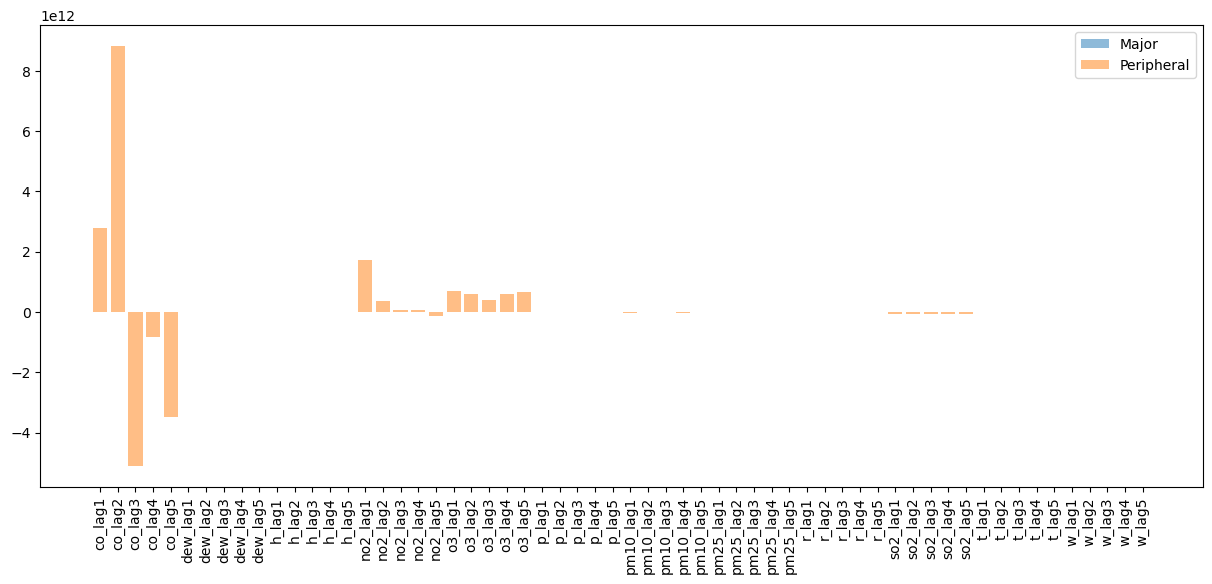

In [94]:
plt.figure(figsize=(15, 6))
plt.bar(major.mean(numeric_only=True).index, major.mean(numeric_only=True).values, alpha=0.5, label='Major')
plt.bar(peripheral.mean(numeric_only=True).index, peripheral.mean(numeric_only=True).values, alpha=0.5, label='Peripheral')
plt.xticks(rotation=90)
plt.legend()

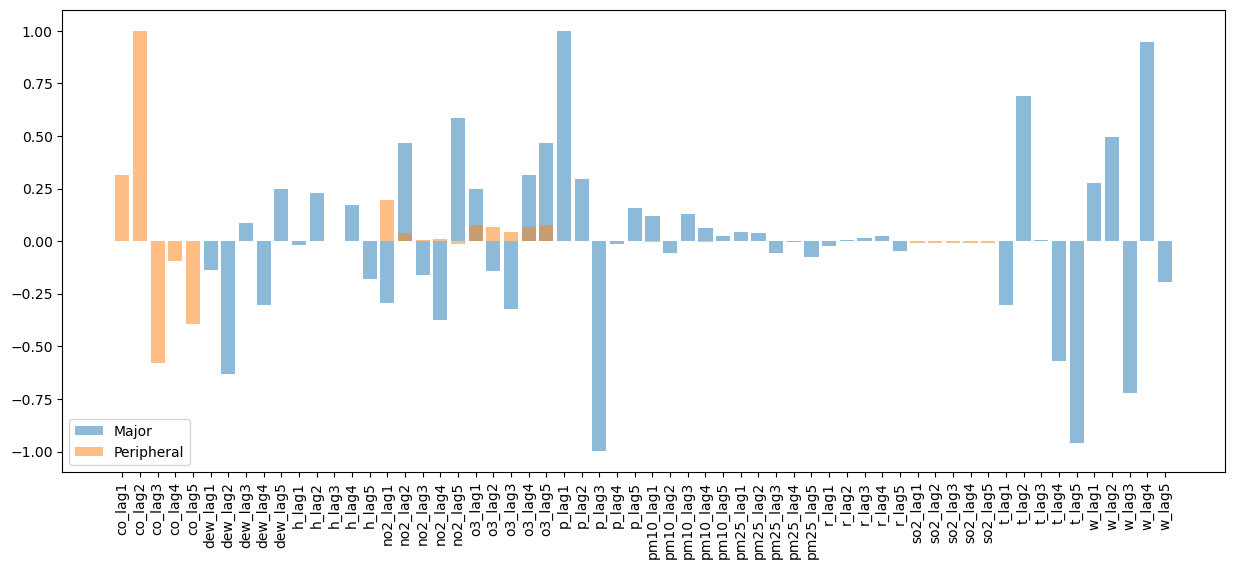

In [95]:
plt.figure(figsize=(15, 6))
plt.bar(major.mean(numeric_only=True).index, major.mean(numeric_only=True).values/major.mean(numeric_only=True).values.__abs__().max(), alpha=0.5, label='Major')
plt.bar(peripheral.mean(numeric_only=True).index, peripheral.mean(numeric_only=True).values/peripheral.mean(numeric_only=True).values.__abs__().max(), alpha=0.5, label='Peripheral')
plt.xticks(rotation=90)
plt.legend()

# autoregressive

In [100]:
df_lagged

,City,time,co,dew,h,no2,o3,p,pm10,pm25,...,t_lag1,t_lag2,t_lag3,t_lag4,t_lag5,w_lag1,w_lag2,w_lag3,w_lag4,w_lag5
1721,Yala,2025-02-24,0.0,23.60,96.50,0.0,0.0,1009.20,33.0,38.0,...,29.70,28.90,27.10,30.85,30.85,4.30,3.05,1.50,3.80,3.80
1722,Yala,2025-02-25,0.0,25.10,95.90,0.0,0.0,1009.40,33.0,53.0,...,24.20,29.70,28.90,27.10,30.85,1.00,4.30,3.05,1.50,3.80
1723,Yala,2025-02-26,0.0,8.25,51.50,0.0,0.0,1011.75,33.0,47.0,...,27.70,24.20,29.70,28.90,27.10,3.00,1.00,4.30,3.05,1.50
1724,Yala,2025-02-27,0.0,-7.10,8.20,0.0,0.0,1007.50,33.0,51.0,...,27.45,27.70,24.20,29.70,28.90,2.05,3.00,1.00,4.30,3.05
1725,Yala,2025-02-28,0.0,-7.20,8.00,0.0,0.0,1006.90,33.0,49.0,...,30.50,27.45,27.70,24.20,29.70,4.60,2.05,3.00,1.00,4.30
1726,Yala,2025-03-01,0.0,-6.90,8.05,0.0,0.0,1007.75,33.0,46.5,...,30.80,30.50,27.45,27.70,24.20,3.00,4.60,2.05,3.00,1.00
1727,Yala,2025-03-02,0.0,-6.10,8.30,0.0,0.0,1007.40,33.0,41.0,...,31.20,30.80,30.50,27.45,27.70,3.00,3.00,4.60,2.05,3.00
1728,Yala,2025-03-03,0.0,-6.40,7.90,0.0,0.0,1007.20,33.0,54.0,...,31.80,31.20,30.80,30.50,27.45,1.50,3.00,3.00,4.60,2.05
1729,Yala,2025-03-04,0.0,-6.70,7.70,0.0,0.0,1006.90,33.0,51.0,...,32.10,31.80,31.20,30.80,30.50,3.00,1.50,3.00,3.00,4.60
1730,Yala,2025-03-05,0.0,-6.10,7.30,0.0,0.0,1002.70,33.0,43.0,...,32.30,32.10,31.80,31.20,30.80,2.00,3.00,1.50,3.00,3.00


In [103]:
def create_lag_features(df, group_col='City', time_col='time', label_col='pm25', lags=3):
    df = df.sort_values([group_col, time_col])
    feature_cols = df.columns.difference([group_col, time_col])

    for col in feature_cols:
        for lag in range(1, lags + 1):
            df[f"{col}_lag{lag}"] = df.groupby(group_col)[col].shift(lag)

    df = df.dropna()
    return df


In [154]:
df

,City,time,co,dew,h,no2,o3,p,pm10,pm25,r,so2,t,w
0,Ayutthaya,2025-02-19,0.1,8.950000,39.500000,3.5,5.2,1011.150000,64.0,104.500000,0.5,0.6,29.8,2.50
1,Ayutthaya,2025-02-20,0.1,8.950000,39.500000,3.5,5.2,1011.150000,64.0,104.500000,0.5,0.6,29.8,2.50
2,Ayutthaya,2025-02-21,0.1,25.300000,84.800000,3.5,5.2,1011.400000,64.0,138.000000,0.5,0.6,25.8,1.00
3,Ayutthaya,2025-02-22,0.1,15.066667,53.633333,3.5,5.2,1013.266667,64.0,82.666667,0.5,0.6,28.4,0.90
4,Ayutthaya,2025-02-23,0.1,9.600000,38.700000,3.5,5.2,1013.150000,64.0,92.500000,0.5,0.6,31.5,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,Yala,2025-04-07,0.0,-6.950000,8.150000,0.0,0.0,1004.200000,33.0,37.500000,0.2,0.0,31.0,1.75
1764,Yala,2025-04-08,0.0,24.400000,66.500000,0.0,0.0,1008.000000,33.0,46.000000,0.2,0.0,31.4,3.60
1765,Yala,2025-04-09,0.0,-6.700000,7.900000,0.0,0.0,1009.500000,33.0,42.000000,0.4,0.0,31.8,3.00
1766,Yala,2025-04-10,0.0,-6.700000,7.500000,0.0,0.0,1005.800000,33.0,39.000000,0.2,0.0,32.6,3.60


In [180]:
df_lagged = create_lag_features(df, lags=1, label_col='pm25')
df_lagged

,City,time,co,dew,h,no2,o3,p,pm10,pm25,...,h_lag1,no2_lag1,o3_lag1,p_lag1,pm10_lag1,pm25_lag1,r_lag1,so2_lag1,t_lag1,w_lag1
1,Ayutthaya,2025-02-20,0.1,8.950000,39.500000,3.5,5.2,1011.150000,64.0,104.500000,...,39.500000,3.5,5.2,1011.150000,64.0,104.500000,0.5,0.6,29.8,2.50
2,Ayutthaya,2025-02-21,0.1,25.300000,84.800000,3.5,5.2,1011.400000,64.0,138.000000,...,39.500000,3.5,5.2,1011.150000,64.0,104.500000,0.5,0.6,29.8,2.50
3,Ayutthaya,2025-02-22,0.1,15.066667,53.633333,3.5,5.2,1013.266667,64.0,82.666667,...,84.800000,3.5,5.2,1011.400000,64.0,138.000000,0.5,0.6,25.8,1.00
4,Ayutthaya,2025-02-23,0.1,9.600000,38.700000,3.5,5.2,1013.150000,64.0,92.500000,...,53.633333,3.5,5.2,1013.266667,64.0,82.666667,0.5,0.6,28.4,0.90
5,Ayutthaya,2025-02-24,0.1,-6.100000,10.000000,3.5,5.2,1016.900000,64.0,42.000000,...,38.700000,3.5,5.2,1013.150000,64.0,92.500000,0.5,0.6,31.5,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,Yala,2025-04-07,0.0,-6.950000,8.150000,0.0,0.0,1004.200000,33.0,37.500000,...,8.200000,0.0,0.0,1008.300000,33.0,33.000000,0.1,0.0,30.7,2.00
1764,Yala,2025-04-08,0.0,24.400000,66.500000,0.0,0.0,1008.000000,33.0,46.000000,...,8.150000,0.0,0.0,1004.200000,33.0,37.500000,0.2,0.0,31.0,1.75
1765,Yala,2025-04-09,0.0,-6.700000,7.900000,0.0,0.0,1009.500000,33.0,42.000000,...,66.500000,0.0,0.0,1008.000000,33.0,46.000000,0.2,0.0,31.4,3.60
1766,Yala,2025-04-10,0.0,-6.700000,7.500000,0.0,0.0,1005.800000,33.0,39.000000,...,7.900000,0.0,0.0,1009.500000,33.0,42.000000,0.4,0.0,31.8,3.00


# autoregressive: lag only label

In [265]:
df = df.fillna(0.0)

In [342]:
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

def train_ar_models(df, lags=5, label_col='pm25'):
    df_lagged = create_lag_features(df, lags=lags, label_col=label_col)
    
    models = {}
    coefs = {}
    scores = {}

    for city, group in df_lagged.groupby('City'):
        pm25_lag_cols = [col for col in group.columns if col.startswith(f'{label_col}_lag')]
        X = group[pm25_lag_cols]
        y = group[label_col]

        X_train, X_test = X[:-10], X[-10:]
        y_train, y_test = y[:-10], y[-10:]

        model = LinearRegression().fit(X_train, y_train)
        score = root_mean_squared_error(y_test, model.predict(X_test))
        models[city] = model
        coefs[city] = pd.Series(model.coef_, index=pm25_lag_cols)
        scores[city] = score

    return models, coefs,scores


In [343]:
mean_scores = {}
for l in range(1,20):
    models, coefs, scores = train_ar_models(df, lags=l, label_col='pm25')
    mean_scores[l] = np.mean(list(scores.values()))
mean_scores

C:\Users\yamch\AppData\Local\Temp\ipykernel_7588\2449241243.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_lag{lag}"] = df.groupby(group_col)[col].shift(lag)
C:\Users\yamch\AppData\Local\Temp\ipykernel_7588\2449241243.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_lag{lag}"] = df.groupby(group_col)[col].shift(lag)
C:\Users\yamch\AppData\Local\Temp\ipykernel_7588\2449241243.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

{1: 22.1394302393707,
 2: 21.58022366165548,
 3: 21.638994480454784,
 4: 22.232161702031256,
 5: 22.557472859588454,
 6: 22.859100660019983,
 7: 23.036020250501537,
 8: 23.95208746571579,
 9: 24.74564481209343,
 10: 25.484034349558964,
 11: 26.73997513220813,
 12: 28.558174945568215,
 13: 30.11016498281534,
 14: 35.080426963910725,
 15: 41.964019966406916,
 16: 49.89200943034605,
 17: 63.01717782278788,
 18: 81.55581239129255,
 19: 106.79201666337818}

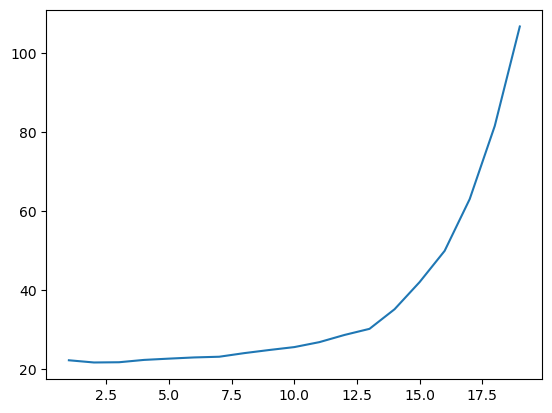

In [344]:
plt.plot(mean_scores.keys(), mean_scores.values())

In [345]:
models, coefs, scores = train_ar_models(df, lags=5, label_col='pm25')

coefMat = pd.DataFrame(coefs).T.reset_index(names='City')
coefMat['city_type'] = coefMat['City'].map(city_type)
maj = coefMat[coefMat['city_type']=='Major']
per = coefMat[coefMat['city_type']=='Peripheral']
import numpy as np
maj_mean = maj.mean(numeric_only=True)
per_mean = per.mean(numeric_only=True)
pd.concat([maj_mean, per_mean], axis=1, keys=['Major', 'Peripheral']).reset_index(names='feature').to_csv('LagOnlyLabel.csv', index=False)
pd.concat([maj_mean, per_mean], axis=1, keys=['Major', 'Peripheral'])

,Major,Peripheral
pm25_lag1,0.633383,0.735491
pm25_lag2,0.123117,0.037843
pm25_lag3,-0.043027,-0.009448
pm25_lag4,0.040260,-0.016954
pm25_lag5,-0.068527,-0.012655


Text(0.5, 1.0, 'Comparison of Average Coefficient Values\nin autoregressive model: Major vs Peripheral\nuse only lag of label value')

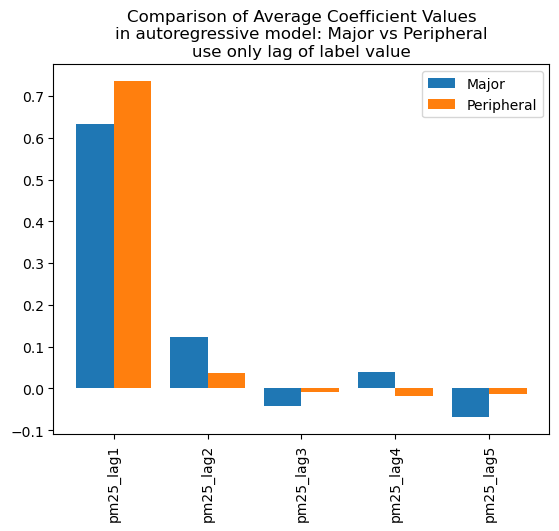

In [341]:
x = np.arange(len(maj_mean))

# Bar width
width = 0.4

# Plot
plt.bar(x - width/2, maj_mean.values, width=width, label='Major')
plt.bar(x + width/2, per_mean.values, width=width, label='Peripheral')
plt.xticks(x, maj_mean.index, rotation=90)
plt.legend()
plt.title("Comparison of Average Coefficient Values\nin autoregressive model: Major vs Peripheral\nuse only lag of label value")

# autoregressive: lag only label with exogenous input

In [346]:
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

def train_ar_models(df, lags=5, label_col='pm25'):
    df_lagged = create_lag_features(df, lags=lags, label_col=label_col)
    
    models = {}
    coefs = {}
    scores = {}

    for city, group in df_lagged.groupby('City'):
        y = group[label_col]
        X = group[['h', 'o3', 'p', 'pm10', 'r', 't', 'w']+[col for col in group.columns if col.startswith(f'{label_col}_lag')]]
        

        X_train, X_test = X[:-10], X[-10:]
        y_train, y_test = y[:-10], y[-10:]

        model = LinearRegression().fit(X_train, y_train)
        score = root_mean_squared_error(y_test, model.predict(X_test))
        models[city] = model
        coefs[city] = pd.Series(model.coef_, index=X.columns)
        scores[city] = score

    return models, coefs,scores

In [347]:
mean_scores = {}
all_scores = {}
for l in range(1,20):
    models, coefs, scores = train_ar_models(df, lags=l, label_col='pm25')
    all_scores[l] = scores
    mean_scores[l] = np.mean(list(scores.values()))
mean_scores

C:\Users\yamch\AppData\Local\Temp\ipykernel_7588\2449241243.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_lag{lag}"] = df.groupby(group_col)[col].shift(lag)
C:\Users\yamch\AppData\Local\Temp\ipykernel_7588\2449241243.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_lag{lag}"] = df.groupby(group_col)[col].shift(lag)
C:\Users\yamch\AppData\Local\Temp\ipykernel_7588\2449241243.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

{1: 18.84387841177974,
 2: 18.612839901070977,
 3: 19.160650781021417,
 4: 20.108583903695973,
 5: 20.46788651604951,
 6: 34.891258860961415,
 7: 38.02988529685987,
 8: 49.04212457454173,
 9: 50.15969986715023,
 10: 52.660509133269386,
 11: 113.03365113385648,
 12: 138.09951194636008,
 13: 157.44327167392137,
 14: 294.46753107881386,
 15: 337.84492765534344,
 16: 354.57388846762433,
 17: 1609.4492888122902,
 18: 4520.211796738222,
 19: 241.74392469396255}

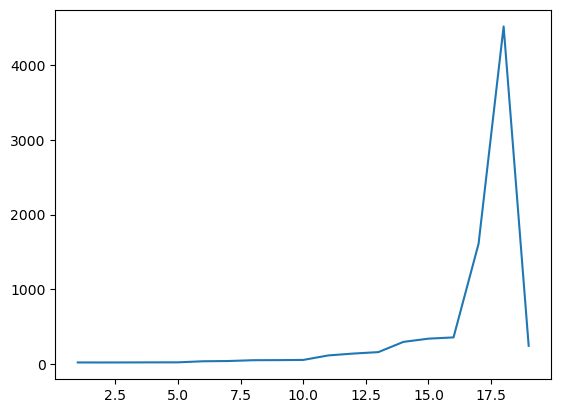

In [348]:
plt.plot(mean_scores.keys(), mean_scores.values())
plt.show()

In [349]:
models, coefs, scores = train_ar_models(df, lags=5, label_col='pm25')
coefMat = pd.DataFrame(coefs).T.reset_index(names='City')
coefMat['city_type'] = coefMat['City'].map(city_type)
coefMat
maj = coefMat[coefMat['city_type']=='Major']
per = coefMat[coefMat['city_type']=='Peripheral']
import numpy as np
maj_mean = maj.mean(numeric_only=True)
per_mean = per.mean(numeric_only=True)
pd.concat([maj_mean, per_mean], axis=1, keys=['Major', 'Peripheral']).reset_index(names='feature').to_csv('LagOnlyLabel woth exo.csv', index=False)
pd.concat([maj_mean, per_mean], axis=1, keys=['Major', 'Peripheral'])

,Major,Peripheral
h,-0.010209,-0.017862
o3,0.368352,0.504867
p,0.715732,0.605288
pm10,0.444802,0.564209
r,-0.084965,-0.047655
t,1.127773,0.460947
w,-4.027186,-1.910959
pm25_lag1,0.359150,0.463358
pm25_lag2,-0.020703,-0.006893
pm25_lag3,0.001304,-0.030067


Text(0.5, 1.0, 'Comparison of Average Coefficient Values\nin autoregressive model: Major vs Peripheral\nuse only lag of label value and exogenoeus input')

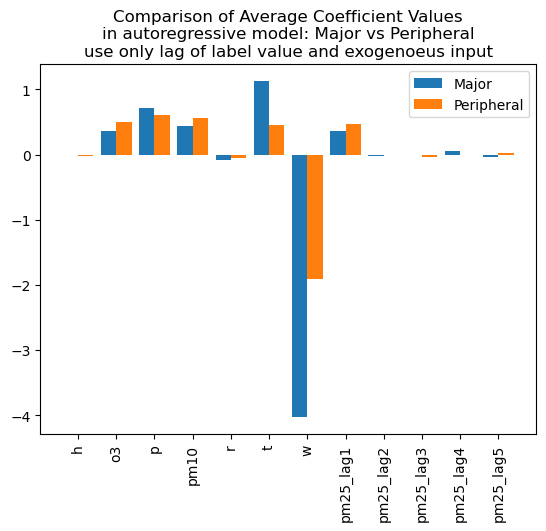

In [336]:
x = np.arange(len(maj_mean))

# Bar width
width = 0.4

# Plot
plt.bar(x - width/2, maj_mean.values, width=width, label='Major')
plt.bar(x + width/2, per_mean.values, width=width, label='Peripheral')
plt.xticks(x, maj_mean.index, rotation=90)
plt.legend()
plt.title("Comparison of Average Coefficient Values\nin autoregressive model: Major vs Peripheral\nuse only lag of label value and exogenoeus input")

# lag all variables

In [350]:
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

def train_ar_models(df, lags=5, label_col='pm25'):
    df_lagged = create_lag_features(df, lags=lags, label_col=label_col)
    
    models = {}
    coefs = {}
    scores = {}

    for city, group in df_lagged.groupby('City'):
        y = group[label_col]
        X = group[[col for col in group.columns if 'lag' in col]]
        

        X_train, X_test = X[:-10], X[-10:]
        y_train, y_test = y[:-10], y[-10:]

        model = LinearRegression().fit(X_train, y_train)
        score = root_mean_squared_error(y_test, model.predict(X_test))
        models[city] = model
        coefs[city] = pd.Series(model.coef_, index=X.columns)
        scores[city] = score

    return models, coefs,scores

In [351]:
mean_scores = {}
all_scores = {}
for l in range(1,20):
    models, coefs, scores = train_ar_models(df, lags=l, label_col='pm25')
    all_scores[l] = scores
    mean_scores[l] = np.mean(list(scores.values()))
mean_scores

C:\Users\yamch\AppData\Local\Temp\ipykernel_7588\2449241243.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_lag{lag}"] = df.groupby(group_col)[col].shift(lag)
C:\Users\yamch\AppData\Local\Temp\ipykernel_7588\2449241243.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_lag{lag}"] = df.groupby(group_col)[col].shift(lag)
C:\Users\yamch\AppData\Local\Temp\ipykernel_7588\2449241243.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

{1: 24.896803916227057,
 2: 28.961894780977392,
 3: 34.780745343684934,
 4: 52.16422371333893,
 5: 141.82967270277229,
 6: 264.22085578830286,
 7: 91.04885770162038,
 8: 83.40279741708692,
 9: 64.50483018489486,
 10: 68.43038851187309,
 11: 60.43475848965133,
 12: 48.99048361647786,
 13: 53.12453719031723,
 14: 52.37373232331445,
 15: 48.07029891847069,
 16: 45.37577793750074,
 17: 43.762846842001025,
 18: 45.57774648702415,
 19: 46.11863842651077}

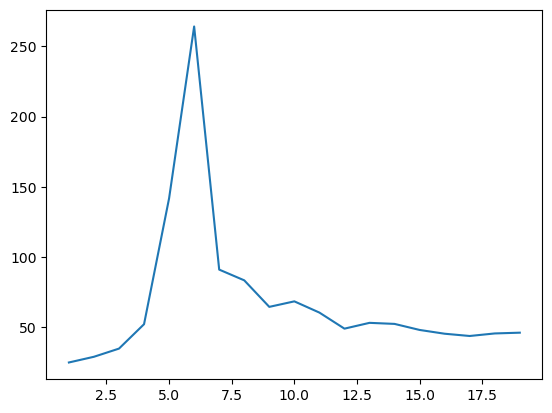

In [352]:
plt.plot(mean_scores.keys(), mean_scores.values())
plt.show()

In [353]:
models, coefs, scores = train_ar_models(df, lags=4, label_col='pm25')
coefMat = pd.DataFrame(coefs).T.reset_index(names='City')
coefMat['city_type'] = coefMat['City'].map(city_type)
coefMat
maj = coefMat[coefMat['city_type']=='Major']
per = coefMat[coefMat['city_type']=='Peripheral']
maj

,City,h_lag1,h_lag2,h_lag3,h_lag4,o3_lag1,o3_lag2,o3_lag3,o3_lag4,p_lag1,...,r_lag4,t_lag1,t_lag2,t_lag3,t_lag4,w_lag1,w_lag2,w_lag3,w_lag4,city_type
1,Bangkok,0.587364,0.257009,0.598697,0.405193,4.423425e+00,3.987070e+00,7.164686e+00,-5.469872e-01,-5.163162,...,-0.824851,-12.150111,-18.832427,-8.731225,7.324342,8.810375,7.914287,2.819256,2.569179,Major
2,Chiang Mai,-0.133604,-0.929447,-0.215473,0.170290,4.374279e-14,-2.418066e-13,-4.085621e-14,8.082424e-14,1.685580,...,-0.228078,3.032812,-0.334372,-2.415470,2.588804,-21.167793,-14.442117,-31.024745,-8.499221,Major
3,Chonburi,-0.061590,-0.103133,0.108077,0.198223,1.787459e-14,3.852474e-14,3.724798e-14,3.408385e-14,-2.795603,...,-0.123879,-2.171641,0.192611,2.719243,-0.694590,12.148289,9.005294,7.581814,5.333744,Major
4,Kanchanaburi,-0.854027,-0.279689,-0.366145,-0.111513,-8.459899e-14,-7.105427e-15,4.662937e-14,-2.531308e-14,-2.080122,...,0.231935,-2.649785,-2.540543,-7.148746,1.601311,8.496205,-1.669926,9.306236,13.869393,Major
8,Mueang Khon Kaen,-0.327243,-0.278567,0.297247,0.077279,-2.853273e-14,-1.576517e-14,-4.174439e-14,1.665335e-14,0.560758,...,-0.319072,-1.572362,1.549014,-0.120281,1.777861,-1.093924,-5.036541,-26.244059,-9.911033,Major
10,Nakhon Ratchasima,0.038970,-0.338060,-0.207366,-0.054257,2.823658e+00,2.497254e+00,1.824078e+00,-2.981436e+00,-3.145376,...,0.207189,-4.541676,-4.691171,-1.372012,2.683759,-9.287258,-5.786672,7.326333,9.796030,Major
19,Phuket,0.044786,-0.083952,0.258508,-0.317734,-2.786660e-14,-1.650069e-14,7.618906e-15,-2.975398e-14,4.302261,...,0.042931,2.808638,-2.320668,2.403011,-3.738986,-0.863270,-1.030025,-9.623503,4.440944,Major
22,Rayong,-0.159628,0.039931,0.004570,0.092747,7.882583e-15,7.271961e-15,-2.775558e-15,-5.606626e-15,3.957411,...,0.065913,-3.181230,-0.882004,0.880372,5.349388,-1.972622,0.629401,-4.816873,-1.474630,Major


In [354]:
per

,City,h_lag1,h_lag2,h_lag3,h_lag4,o3_lag1,o3_lag2,o3_lag3,o3_lag4,p_lag1,...,r_lag4,t_lag1,t_lag2,t_lag3,t_lag4,w_lag1,w_lag2,w_lag3,w_lag4,city_type
0,Ayutthaya,0.752682,-0.028030,-0.139629,-0.107006,1.421085e-14,-8.770762e-15,-1.210143e-14,-1.465494e-14,0.818958,...,9.005467e-01,-0.551466,1.470567,1.888637,4.464259,-3.613104,-5.130415,0.402519,-10.733613,Peripheral
5,Lampang,-0.162532,-0.223391,0.048685,0.179339,-1.776357e-14,5.723200e-14,2.109424e-15,2.220446e-14,0.243880,...,4.219992e-01,3.555049,0.262564,1.486209,3.874222,0.099119,12.931870,8.610907,8.146929,Peripheral
6,Lamphun,-0.767714,-0.327195,-0.117038,-0.847949,1.594171e+00,-4.035378e+00,1.420362e+00,-1.878984e+00,0.486359,...,-5.865679e-01,-0.464796,-1.736814,0.395067,0.263432,3.257552,5.956962,1.124600,-1.760821,Peripheral
7,Mueang Chiang Rai,-3.064016,-0.090745,0.107402,-4.635683,-1.376677e-14,-4.440892e-15,-7.993606e-15,-4.440892e-16,-1.345934,...,2.220446e-16,-4.389619,0.482864,-0.781210,-12.575176,-0.969553,-5.323018,3.290100,10.915391,Peripheral
9,Nakhon Pathom,0.353901,-0.600923,0.398730,0.285666,1.265654e-13,5.773160e-15,-6.461498e-14,-3.552714e-14,4.020547,...,-3.631102e-01,6.952461,-13.280587,-3.804339,3.257321,-10.194645,20.009241,-12.323101,10.009508,Peripheral
11,Nakhon Sawan,-0.131076,0.189862,0.024037,0.370082,1.648519e-14,-5.633806e-14,1.344118e-14,-4.197827e-14,0.684780,...,-2.200470e-01,-0.367589,-1.001803,-0.738088,3.133061,-0.519996,2.869192,-16.581404,23.965085,Peripheral
12,Nan,-0.241231,0.231581,0.354672,-0.734057,-4.914024e+01,-8.442214e+01,-4.476851e+01,-7.570256e+01,-0.849569,...,-5.692004e-02,-1.644750,-1.604423,4.356580,-1.143975,13.289759,0.700493,1.052178,5.414989,Peripheral
13,Narathiwat,0.064120,-0.067460,0.070226,-0.184289,1.565414e-14,-9.547918e-15,-3.488876e-14,-1.887379e-15,1.989171,...,-3.333337e-02,6.417138,-0.876548,1.787781,-4.753183,-3.132460,-0.574313,-0.904346,1.755714,Peripheral
14,Nong Khai,0.344778,1.022154,-0.376319,-0.211000,8.407634e+00,6.210409e+00,7.180933e+00,-8.398153e+00,-0.766395,...,4.642439e-01,-1.527766,-1.334067,0.642866,2.718467,6.697383,-17.037543,20.868850,-17.051364,Peripheral
15,Nonthaburi,-0.596791,-0.476743,0.446020,-2.147854,6.851612e-16,-1.012939e-14,-3.542656e-15,-1.432931e-14,5.656211,...,0.000000e+00,1.449286,-6.679206,5.194423,-3.234750,-6.225116,-1.385111,5.240390,7.068247,Peripheral


In [356]:
import numpy as np
maj_mean = maj.mean(numeric_only=True)
per_mean = per.mean(numeric_only=True)
pd.concat([maj_mean, per_mean], axis=1, keys=['Major', 'Peripheral']).reset_index(names='feature').to_csv('Lag all input.csv', index=False)
pd.concat([maj_mean, per_mean], axis=1, keys=['Major', 'Peripheral'])

,Major,Peripheral
h_lag1,-0.108121,-0.180349
h_lag2,-0.214488,-0.024147
h_lag3,0.059764,0.069785
h_lag4,0.057528,-0.329859
o3_lag1,0.905885,-1.074062
o3_lag2,0.810540,-2.538537
o3_lag3,1.123595,-1.531527
o3_lag4,-0.441053,-3.558182
p_lag1,-0.334782,1.561272
p_lag2,-1.303408,-1.414189


Text(0.5, 1.0, 'Comparison of Average Coefficient Values\nin autoregressive model: Major vs Peripheral\nuse lag of all input')

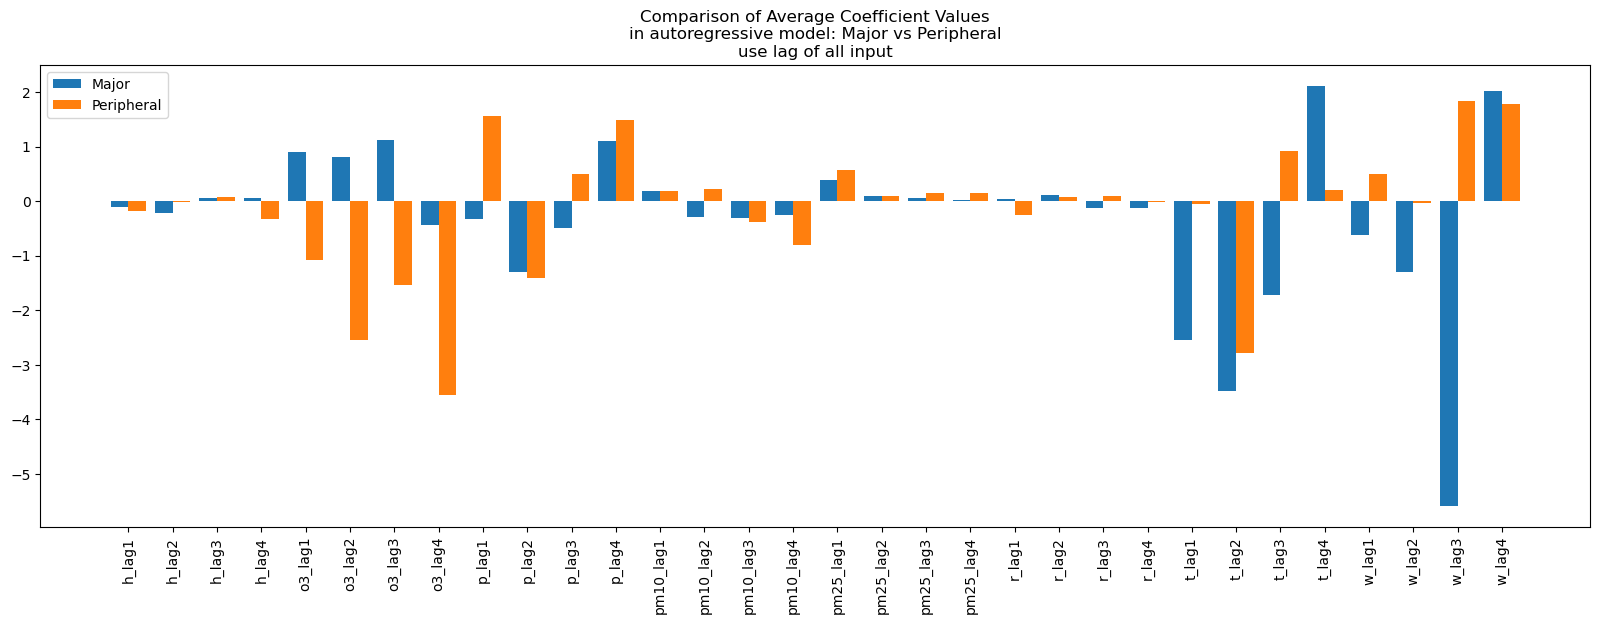

In [357]:
x = np.arange(len(maj_mean))

# Bar width
width = 0.4

# Plot
plt.figure(figsize=(20,6))
plt.bar(x - width/2, maj_mean.values, width=width, label='Major')
plt.bar(x + width/2, per_mean.values, width=width, label='Peripheral')
plt.xticks(x, maj_mean.index, rotation=90)
plt.legend()
plt.title("Comparison of Average Coefficient Values\nin autoregressive model: Major vs Peripheral\nuse lag of all input")